Name : Anggoletomi Marlis Putra\
Class : DigitalSkola - Data Engineer Batch 5\
Homework : Data Exploratory (Advanced Python II)

Dataset yang digunakan berasal dari kaggle. Dataset mengenai 'Top 1000 TikTok Influencers Ranking/

# a. Introductory Details About Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/anggo/Desktop/tiktok_top_1000.csv')

df.head()

,Country,Rank,Account,Title,Link,Subscribers count,Views avg.,Likes avg.,Comments avg.,Shares avg.,Scraped
0,All,1,billieeilish,BILLIE EILISH,https://www.tiktok.com/@billieeilish,41600000.0,95000000.0,18100000.0,151000.0,54800.0,2022-02-07 16:54:35.641971
1,All,2,badbunny,Bad Bunny,https://www.tiktok.com/@badbunny,13400000.0,33300000.0,7300000.0,101900.0,106800.0,2022-02-07 16:54:35.641971
2,All,3,chipmunksoftiktok,Chipmunks of TikTok,https://www.tiktok.com/@chipmunksoftiktok,11400000.0,25000000.0,3000000.0,21800.0,64200.0,2022-02-07 16:54:35.641971
3,All,4,charlidamelio,charli d’amelio,https://www.tiktok.com/@charlidamelio,135400000.0,18700000.0,2600000.0,54700.0,35200.0,2022-02-07 16:54:35.641971
4,All,5,yessicadcs,Yessica y Moises 🦜,https://www.tiktok.com/@yessicadcs,263700.0,16700000.0,1400000.0,16200.0,138400.0,2022-02-07 16:54:35.641971


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            1000 non-null   object 
 1   Rank               1000 non-null   int64  
 2   Account            1000 non-null   object 
 3   Title              998 non-null    object 
 4   Link               1000 non-null   object 
 5   Subscribers count  1000 non-null   float64
 6   Views avg.         1000 non-null   float64
 7   Likes avg.         1000 non-null   float64
 8   Comments avg.      1000 non-null   float64
 9   Shares avg.        1000 non-null   float64
 10  Scraped            1000 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


# b. Statistical Insight

In [3]:
df.describe()

,Rank,Subscribers count,Views avg.,Likes avg.,Comments avg.,Shares avg.
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,500.500000,7.049170e+06,3.700866e+06,4.537407e+05,4559.051000,1.068108e+04
std,288.819436,1.087267e+07,4.697164e+06,6.964760e+05,7766.145534,1.677724e+05
min,1.000000,4.300000e+03,5.853000e+05,3.100000e+04,0.000000,2.120000e+02
25%,250.750000,1.400000e+06,1.800000e+06,2.304500e+05,1600.000000,1.200000e+03
50%,500.500000,3.700000e+06,2.600000e+06,3.202000e+05,2800.000000,2.400000e+03
75%,750.250000,8.625000e+06,4.000000e+06,4.783750e+05,4900.000000,5.400000e+03
max,1000.000000,1.354000e+08,9.500000e+07,1.810000e+07,151000.000000,5.300000e+06


# c. Data Cleaning

## Handling Missing Data

In [4]:
#Check missing data

df.isna().sum()

Country              0
Rank                 0
Account              0
Title                2
Link                 0
Subscribers count    0
Views avg.           0
Likes avg.           0
Comments avg.        0
Shares avg.          0
Scraped              0
dtype: int64

In [5]:
# data yang hilang pada kolomn title sangat sedikit, hanya 2 row diantara 1000 row (0.2%) sehingga tidak masalah jika kita drop

df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            998 non-null    object 
 1   Rank               998 non-null    int64  
 2   Account            998 non-null    object 
 3   Title              998 non-null    object 
 4   Link               998 non-null    object 
 5   Subscribers count  998 non-null    float64
 6   Views avg.         998 non-null    float64
 7   Likes avg.         998 non-null    float64
 8   Comments avg.      998 non-null    float64
 9   Shares avg.        998 non-null    float64
 10  Scraped            998 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 93.6+ KB


## Handling Duplicate Data

In [6]:
df.duplicated().sum()

#tidak ditemukan data yang duplikat

0

# d. Data Visualization

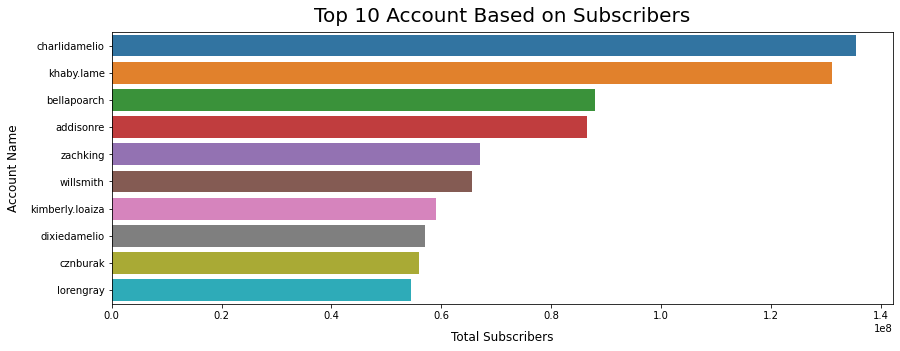

In [7]:
#Top 10 Subscribers

df_top10_subs = df.sort_values(['Subscribers count'],ascending=False).head(10).reset_index()

plt.figure(figsize=(14,5))
sns.barplot(x = 'Subscribers count', y = 'Account', data = df_top10_subs)
plt.title('Top 10 Account Based on Subscribers',fontsize=20, pad=10)
plt.xlabel('Total Subscribers',fontsize=12,labelpad=10)
plt.ylabel('Account Name',fontsize=12,labelpad=10)
plt.show()

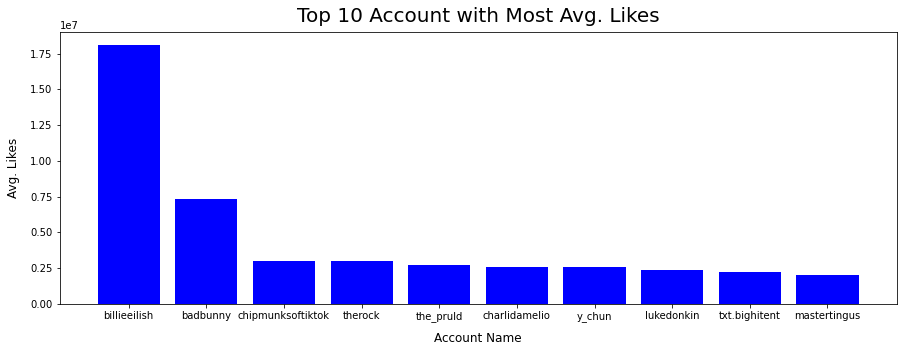

In [8]:
#Top 10 Account with Most Likes

df_top10_likes = df.sort_values(['Likes avg.'],ascending=False).head(10).reset_index()

plt.figure(figsize = (15,5))
plt.bar(x=df_top10_likes['Account'],height=df_top10_likes['Likes avg.'], color = ('b'))
plt.title('Top 10 Account with Most Avg. Likes',fontsize=20, pad=10)
plt.xlabel('Account Name',fontsize=12,labelpad=10)
plt.ylabel('Avg. Likes',fontsize=12,labelpad=10)
plt.show()